We call our training and test data, but remembering that our 'ZipCode' column should be treated as a categorical feature rather than a numeric one. Let's handle this by excluding 'ZipCode' from the K-Means clustering and ensuring all other columns are numeric.

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the training and test data
X_train = pd.read_csv('/Users/admin/Desktop/X_train.csv', dtype={'ZipCode': str})
X_test = pd.read_csv('/Users/admin/Desktop/X_test.csv', dtype={'ZipCode': str})
y_train = pd.read_csv('/Users/admin/Desktop/y_train.csv')
y_test = pd.read_csv('/Users/admin/Desktop/y_test.csv')

# Drop 'ZipCode' column from the training and test data
X_train_cluster = X_train.drop(columns=['ZipCode'])
X_test_cluster = X_test.drop(columns=['ZipCode'])

# Replace non-numeric values with NaN in training data
X_train_cluster.replace('-', np.nan, inplace=True)
X_test_cluster.replace('-', np.nan, inplace=True)

# Fill NaN values with the mean of the column in training data
X_train_cluster.fillna(X_train_cluster.mean(), inplace=True)
X_test_cluster.fillna(X_test_cluster.mean(), inplace=True)

# Verify that all data is now numeric in training and test data
print(X_train_cluster.dtypes)
print(X_test_cluster.dtypes)

Year      int64
PC1     float64
PC2     float64
PC3     float64
PC4     float64
PC5     float64
dtype: object
Year      int64
PC1     float64
PC2     float64
PC3     float64
PC4     float64
PC5     float64
dtype: object


Now we perform K-Means clustering on the numeric features.

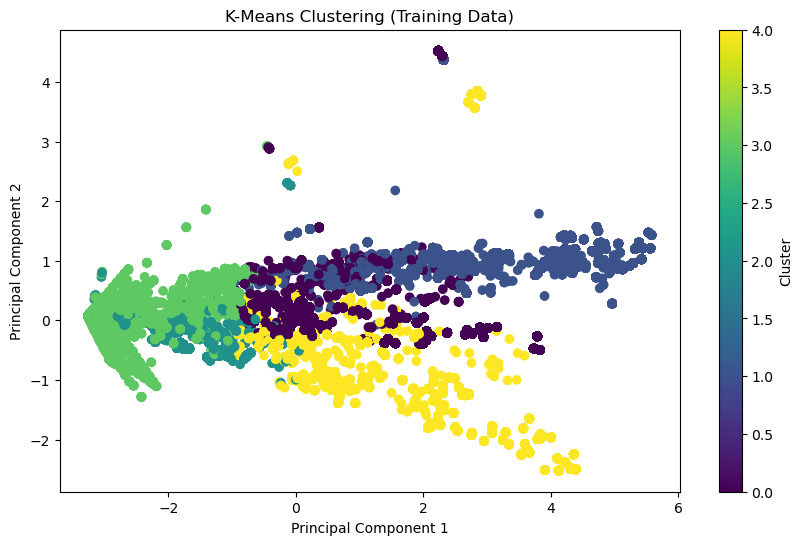

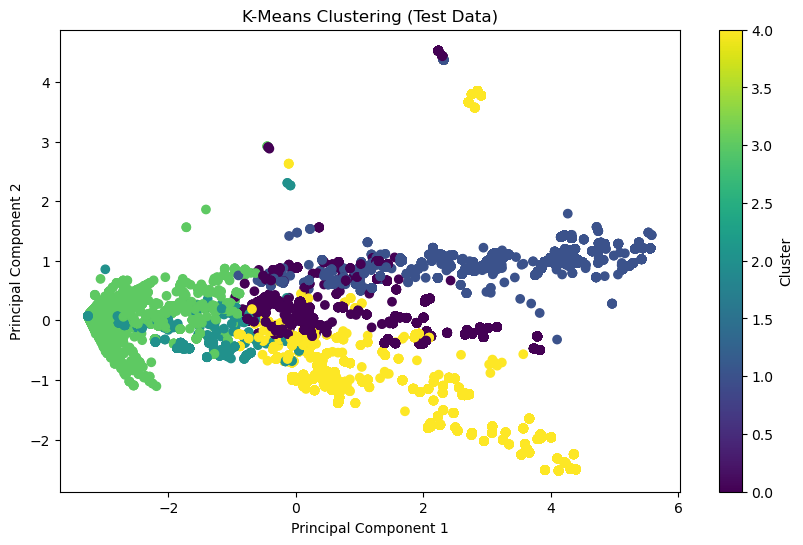

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Fit the K-Means model on the training data with explicit n_init
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(X_train_cluster)

# Predict clusters for the training and test data
train_clusters = kmeans.predict(X_train_cluster)
test_clusters = kmeans.predict(X_test_cluster)

# Add the cluster assignments to the original training and test data
X_train['Cluster'] = train_clusters
X_test['Cluster'] = test_clusters

# Save the training and test data with clusters
X_train.to_csv('/Users/admin/Desktop/X_train_with_clusters.csv', index=False)
X_test.to_csv('/Users/admin/Desktop/X_test_with_clusters.csv', index=False)

# Visualize the clusters in the training data
plt.figure(figsize=(10, 6))
plt.scatter(X_train['PC1'], X_train['PC2'], c=train_clusters, cmap='viridis')
plt.title('K-Means Clustering (Training Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Visualize the clusters in the test data
plt.figure(figsize=(10, 6))
plt.scatter(X_test['PC1'], X_test['PC2'], c=test_clusters, cmap='viridis')
plt.title('K-Means Clustering (Test Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

Key insights from K-Means Clustering Plot:

Cluster Distribution:
The data points have been grouped into 5 clusters, as indicated by the different colors in the plots. The clusters appear to be reasonably well-separated, indicating that the K-Means algorithm has effectively identified distinct groupings within the data.

Principal Components:
The x-axis (Principal Component 1) and y-axis (Principal Component 2) represent the two principal components that capture the most variance in the data. The spread of the data points along these axes provides insight into the underlying structure of the data, with some clusters more densely packed and others more spread out.

Training vs. Test Data:
The distribution of clusters in the training data closely matches that in the test data, suggesting that the model generalizes well to unseen data. This consistency indicates that the features used for clustering (the principal components) are robust and the clustering model is reliable.

Cluster Characteristics:
Each cluster likely represents a group of similar education levels and NAICS codes, though further analysis would be required to interpret the specific characteristics of each cluster. Clusters that are closer together may share more similarities than those that are further apart.

CLUSTER ANALYSIS

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data with clusters
data_with_clusters = pd.read_csv('/Users/admin/Desktop/data_with_clusters.csv')

# Ensure that 'Year' and 'NAICS' are treated as strings if needed
data_with_clusters['Year'] = data_with_clusters['Year'].astype(str)
data_with_clusters['NAICS'] = data_with_clusters['NAICS'].astype(str)

# Display the first few rows to ensure data is loaded correctly
print(data_with_clusters.head())

   Year   NAICS      PC1       PC2       PC3       PC4       PC5  \
0  2020  541600 -3.26135  0.073106 -0.027012  0.097475 -0.043293   
1  2020  541510 -3.26135  0.073106 -0.027012  0.097475 -0.043293   
2  2020  541600 -3.26135  0.073106 -0.027012  0.097475 -0.043293   
3  2020  541510 -3.26135  0.073106 -0.027012  0.097475 -0.043293   
4  2020  541600 -3.26135  0.073106 -0.027012  0.097475 -0.043293   

   ZipCode_01742  ZipCode_01752  ZipCode_01801  ...  ZipCode_98164  \
0            0.0            0.0            0.0  ...            0.0   
1            0.0            0.0            0.0  ...            0.0   
2            0.0            0.0            0.0  ...            0.0   
3            0.0            0.0            0.0  ...            0.0   
4            0.0            0.0            0.0  ...            0.0   

   ZipCode_98177  ZipCode_98208  ZipCode_98662  ZipCode_EC2Y9  ZipCode_K0J1J  \
0            0.0            0.0            0.0            0.0            0.0   
1         

In [4]:
# Calculate mean values for each cluster
cluster_stats = data_with_clusters.groupby('Cluster').mean(numeric_only=True)

# Save cluster statistics
cluster_stats.to_csv('/Users/admin/Desktop/cluster_stats.csv', index=True)

# Display cluster statistics
print(cluster_stats)

              PC1       PC2       PC3       PC4       PC5  ZipCode_01742  \
Cluster                                                                    
0        3.201647 -1.828405  0.994388  0.008756 -0.157332       0.000000   
1       -3.091799  0.055467  0.018236  0.134403 -0.097973       0.000015   
2        0.662648 -0.143017 -0.171955 -0.294419  0.392520       0.000000   
3        2.509230  3.996025  3.240518 -1.473348 -0.507678       0.000000   
4        3.643041  0.648488 -0.646889  0.264254 -0.201181       0.000000   

         ZipCode_01752  ZipCode_01801  ZipCode_01880  ZipCode_01886  ...  \
Cluster                                                              ...   
0             0.000000       0.000000       0.000000       0.000000  ...   
1             0.000015       0.000015       0.000015       0.000015  ...   
2             0.000000       0.000000       0.000000       0.000000  ...   
3             0.000000       0.000000       0.000000       0.000000  ...   
4          

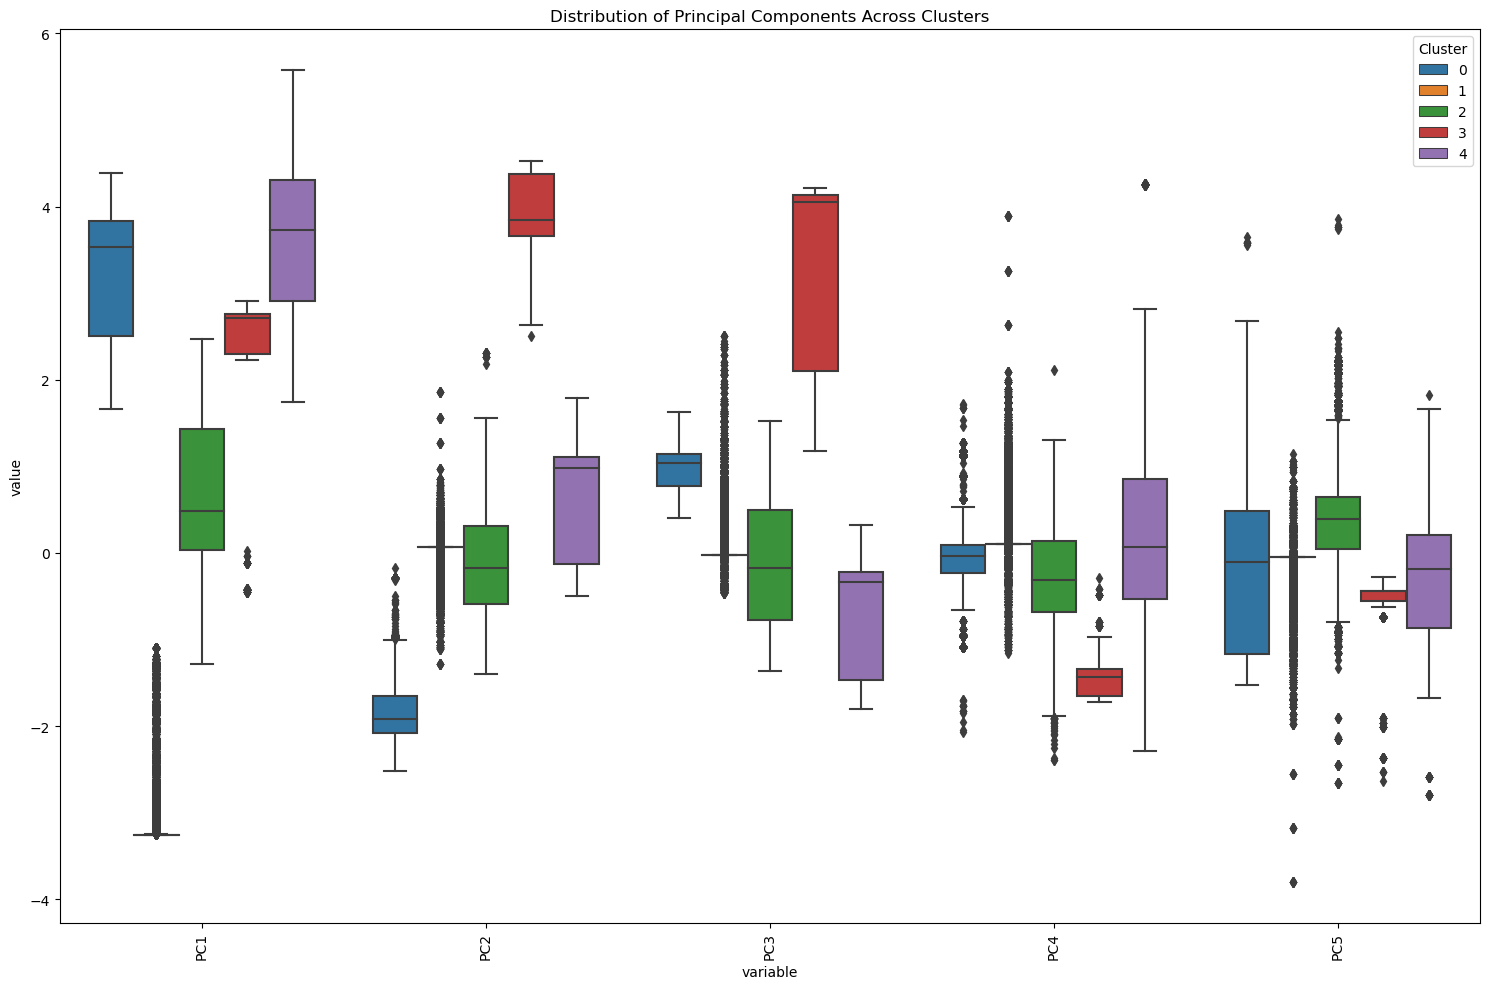

In [5]:
# Melt the data for easier plotting with seaborn
melted_data = pd.melt(data_with_clusters, id_vars=['Cluster'], value_vars=[
    'PC1', 'PC2', 'PC3', 'PC4', 'PC5'
])

# Plot the distributions of the principal components for each cluster
plt.figure(figsize=(15, 10))
sns.boxplot(x='variable', y='value', hue='Cluster', data=melted_data)
plt.xticks(rotation=90)
plt.title('Distribution of Principal Components Across Clusters')
plt.tight_layout()
plt.show()

Summary of Insights

Distinct Clusters: The clusters are well-separated by the principal components, showing that the PCA transformation and K-Means clustering effectively captured the underlying structure of the data.

Principal Component Impact: Some principal components (e.g., PC1 and PC3) have a more significant impact on certain clusters, helping to define their characteristics.

Intra-cluster Variability: There is noticeable variability within some clusters, indicated by the interquartile ranges and outliers, which could be explored further to understand the diversity within those clusters.

In [6]:
# Check if 'ZipCode' column is in the dataframe
if 'ZipCode' in data_with_clusters.columns:
    # Ensure 'Year' is treated as an integer and not float
    data_with_clusters['Year'] = data_with_clusters['Year'].astype(int)
    
    # Ensure 'ZipCode' is treated as string
    data_with_clusters['ZipCode'] = data_with_clusters['ZipCode'].astype(str)
    
    # Define the preprocessing for 'ZipCode' (one-hot encoding)
    preprocessor = ColumnTransformer(
        transformers=[
            ('zipcode', OneHotEncoder(), ['ZipCode'])
        ],
        remainder='passthrough'  # Keep the remaining columns as they are
    )
    
    # Apply the preprocessing
    X = preprocessor.fit_transform(data_with_clusters.drop(columns=['NAICS', 'Cluster']))
    y = data_with_clusters['Cluster']
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Fit the K-Means model again to assign clusters
    kmeans = KMeans(n_clusters=5, random_state=42)
    kmeans.fit(X_train)
    
    # Compute the silhouette score for the training data
    silhouette_avg = silhouette_score(X_train, kmeans.labels_)
    print(f'Silhouette Score: {silhouette_avg}')
    
    # Apply the Elbow Method
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(X_train)
        wcss.append(kmeans.inertia_)
    
    # Plot the Elbow Method graph
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), wcss, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
else:
    print("ZipCode column not found in the dataframe.")

ZipCode column not found in the dataframe.


In [7]:
print(data_with_clusters.columns)

Index(['Year', 'NAICS', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'ZipCode_01742',
       'ZipCode_01752', 'ZipCode_01801',
       ...
       'ZipCode_98164', 'ZipCode_98177', 'ZipCode_98208', 'ZipCode_98662',
       'ZipCode_EC2Y9', 'ZipCode_K0J1J', 'ZipCode_M2N 6', 'ZipCode_M5J 2',
       'ZipCode_sw72a', 'Cluster'],
      dtype='object', length=930)


In [8]:
# Inspect the columns in your dataframe
print(data_with_clusters.columns)

# Verify that 'Cluster' is your target column
target_column = 'Cluster'

# Identify the feature columns (excluding the target column)
feature_columns = [col for col in data_with_clusters.columns if col != target_column]

# Ensure that your feature set includes the relevant education level columns and any other predictors
# Example: Including education level columns and principal components
feature_columns = [col for col in data_with_clusters.columns if col.startswith('PC') or col.startswith('ZipCode')]


Index(['Year', 'NAICS', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'ZipCode_01742',
       'ZipCode_01752', 'ZipCode_01801',
       ...
       'ZipCode_98164', 'ZipCode_98177', 'ZipCode_98208', 'ZipCode_98662',
       'ZipCode_EC2Y9', 'ZipCode_K0J1J', 'ZipCode_M2N 6', 'ZipCode_M5J 2',
       'ZipCode_sw72a', 'Cluster'],
      dtype='object', length=930)


In [9]:
from sklearn.model_selection import train_test_split

X = data_with_clusters[feature_columns]
y = data_with_clusters[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9998755522369486
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3210
           1       1.00      1.00      1.00     13315
           2       1.00      1.00      1.00      8594
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00      6412

    accuracy                           1.00     32142
   macro avg       1.00      1.00      1.00     32142
weighted avg       1.00      1.00      1.00     32142



In [12]:
# Create a dataframe to store the test results
results = X_test.copy()
results['Predictions'] = predictions

# If needed, add the original zip codes back to the results for reference
# Assuming 'original_data' has the original 'ZipCode' column
# results['OriginalZipCode'] = original_data.loc[X_test.index, 'ZipCode']

# Display the results
print(results.head())

             PC1       PC2       PC3       PC4       PC5  ZipCode_01742  \
34827  -3.261350  0.073106 -0.027012  0.097475 -0.043293            0.0   
116897  0.255396 -0.262599 -0.950262 -0.246881  0.323543            0.0   
158530 -3.261350  0.073106 -0.027012  0.097475 -0.043293            0.0   
22432   0.054491  0.122481 -0.655194  0.162552  0.750251            0.0   
37579   4.307864  1.176153 -0.232697  0.843244 -0.450064            0.0   

        ZipCode_01752  ZipCode_01801  ZipCode_01880  ZipCode_01886  ...  \
34827             0.0            0.0            0.0            0.0  ...   
116897            0.0            0.0            0.0            0.0  ...   
158530            0.0            0.0            0.0            0.0  ...   
22432             0.0            0.0            0.0            0.0  ...   
37579             0.0            0.0            0.0            0.0  ...   

        ZipCode_98164  ZipCode_98177  ZipCode_98208  ZipCode_98662  \
34827             0.0       

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Make predictions
logistic_predictions = logistic_model.predict(X_test)

# Evaluate the logistic model
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_report = classification_report(y_test, logistic_predictions)

print(f"Logistic Regression Accuracy: {logistic_accuracy}")
print(f"Logistic Regression Classification Report:\n{logistic_report}")

# Save logistic model metrics
logistic_metrics = {
    'Accuracy': [logistic_accuracy],
    'Precision': [classification_report(y_test, logistic_predictions, output_dict=True)['weighted avg']['precision']],
    'Recall': [classification_report(y_test, logistic_predictions, output_dict=True)['weighted avg']['recall']],
    'F1-Score': [classification_report(y_test, logistic_predictions, output_dict=True)['weighted avg']['f1-score']]
}
logistic_metrics_df = pd.DataFrame(logistic_metrics)
logistic_metrics_df.to_csv('/Users/admin/Desktop/logistic_model_metrics.csv', index=False)

Logistic Regression Accuracy: 0.9998444402961857
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3210
           1       1.00      1.00      1.00     13315
           2       1.00      1.00      1.00      8594
           3       1.00      1.00      1.00       611
           4       1.00      1.00      1.00      6412

    accuracy                           1.00     32142
   macro avg       1.00      1.00      1.00     32142
weighted avg       1.00      1.00      1.00     32142



Let's do a Geographical Clustering Analysis 

In [ ]:
# Convert one-hot encoded zip codes back to a single column
data_with_clusters['ZipCode'] = data_with_clusters[[col for col in data_with_clusters.columns if col.startswith('ZipCode_')]].idxmax(axis=1)
data_with_clusters['ZipCode'] = data_with_clusters['ZipCode'].str.replace('ZipCode_', '')

In [17]:
import pandas as pd
import numpy as np

# Load the data
final_file_path = '/Users/admin/Desktop/final_filtered_business_education_data_corrected.csv'
data = pd.read_csv(final_file_path)

# Ensure the LOCATION column contains only strings before applying eval
def safe_eval(x):
    try:
        return eval(x)
    except:
        return np.nan

data['LOCATION'] = data['LOCATION'].apply(lambda x: safe_eval(x) if isinstance(x, str) else np.nan)

# Extract latitude and longitude from the LOCATION column
data['Latitude'] = data['LOCATION'].apply(lambda x: x[0] if pd.notnull(x) else np.nan)
data['Longitude'] = data['LOCATION'].apply(lambda x: x[1] if pd.notnull(x) else np.nan)

# Verify the updated DataFrame
print(data[['LOCATION', 'Latitude', 'Longitude']].head())

               LOCATION  Latitude  Longitude
0                   NaN       NaN        NaN
1   (34.247, -118.3576)   34.2470  -118.3576
2   (34.2702, -118.316)   34.2702  -118.3160
3  (34.2553, -118.3585)   34.2553  -118.3585
4    (34.1867, 34.1867)   34.1867    34.1867


In [25]:
import pandas as pd

# Load your data
final_file_path = '/Users/admin/Desktop/final_filtered_business_education_data_corrected.csv'
data = pd.read_csv(final_file_path)

# Display the columns in the DataFrame to ensure 'Cluster' exists
print(data.columns)

Index(['BUSINESS NAME', 'ZIP CODE', 'NAICS', 'LOCATION START DATE',
       'LOCATION END DATE', 'LOCATION', 'PRIMARY NAICS DESCRIPTION',
       'Pop 18-24 Some College', 'Pop 18-24 Bachelors+', 'Pop 25-34 HS+',
       'Pop 25-34 Bachelors+', 'Pop 35-44 HS+', 'Pop 35-44 Bachelors+',
       'Pop 45-64 HS+', 'Pop 45-64 Bachelors+', 'Pop 65+ HS+',
       'Pop 65+ Bachelors+', 'ZipCode', 'Year'],
      dtype='object')


In [23]:
import folium
import pandas as pd
import numpy as np

# Load your data
final_file_path = '/Users/admin/Desktop/final_filtered_business_education_data_corrected.csv'
data = pd.read_csv(final_file_path)

# Ensure the LOCATION column is properly formatted and extract latitude and longitude
def safe_eval(x):
    try:
        return eval(x)
    except:
        return np.nan

data['LOCATION'] = data['LOCATION'].apply(lambda x: safe_eval(x) if isinstance(x, str) else np.nan)
data['Latitude'] = data['LOCATION'].apply(lambda x: x[0] if pd.notnull(x) else np.nan)
data['Longitude'] = data['LOCATION'].apply(lambda x: x[1] if pd.notnull(x) else np.nan)

# Get unique years from the data
unique_years = sorted(data['Year'].unique())

# Loop through each year to create and save individual maps
for year in unique_years:
    year_data = data[data['Year'] == year]
    
    # Initialize the map centered on Los Angeles
    map_center = [34.0522, -118.2437]  # Coordinates for Los Angeles
    m = folium.Map(location=map_center, zoom_start=10)
    
    # Add circles for each location in the year
    for _, row in year_data.iterrows():
        if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']):
            folium.Circle(
                location=[row['Latitude'], row['Longitude']],
                radius=100,  # Adjust the radius as needed
                popup=f"Year: {year}<br>ZipCode: {row['ZipCode']}<br>Cluster: {row.get('Cluster', 'N/A')}",
                color='blue' if row.get('Cluster') == 0 else 'green' if row.get('Cluster') == 1 else 'red',  # Example coloring by cluster
                fill=True,
                fill_color='blue' if row.get('Cluster') == 0 else 'green' if row.get('Cluster') == 1 else 'red'
            ).add_to(m)
    
    # Save the map to an HTML file
    m.save(f'/Users/admin/Desktop/education_clusters_map_{year}.html')
    
    # Inform the user that the map for the year has been saved
    print(f"The dynamic map for {year} has been saved to /Users/admin/Desktop/education_clusters_map_{year}.html. Please open it in a web browser to view.")

# Final message
print("All yearly maps have been created and saved.")


The dynamic map for 2011 has been saved to /Users/admin/Desktop/education_clusters_map_2011.html. Please open it in a web browser to view.
The dynamic map for 2012 has been saved to /Users/admin/Desktop/education_clusters_map_2012.html. Please open it in a web browser to view.
The dynamic map for 2013 has been saved to /Users/admin/Desktop/education_clusters_map_2013.html. Please open it in a web browser to view.
The dynamic map for 2014 has been saved to /Users/admin/Desktop/education_clusters_map_2014.html. Please open it in a web browser to view.
The dynamic map for 2015 has been saved to /Users/admin/Desktop/education_clusters_map_2015.html. Please open it in a web browser to view.
The dynamic map for 2016 has been saved to /Users/admin/Desktop/education_clusters_map_2016.html. Please open it in a web browser to view.
The dynamic map for 2017 has been saved to /Users/admin/Desktop/education_clusters_map_2017.html. Please open it in a web browser to view.
The dynamic map for 2018 ha

In [42]:
import folium
import pandas as pd
import os
from IPython.display import IFrame, display

# Load your data for each year and combine them
data_file_path = '/Users/admin/Desktop/final_filtered_business_education_data_corrected.csv'
data = pd.read_csv(data_file_path)

# Ensure the LOCATION column is properly formatted and extract latitude and longitude
def safe_eval(x):
    try:
        return eval(x)
    except:
        return None

data['LOCATION'] = data['LOCATION'].apply(lambda x: safe_eval(x) if isinstance(x, str) else None)
data['Latitude'] = data['LOCATION'].apply(lambda x: x[0] if x else None)
data['Longitude'] = data['LOCATION'].apply(lambda x: x[1] if x else None)

# Initialize the map centered on Los Angeles
map_center = [34.0522, -118.2437]
m = folium.Map(location=map_center, zoom_start=10)

# Add data for each year as a separate layer
years = data['Year'].unique()
for year in years:
    fg = folium.FeatureGroup(name=str(year))
    year_data = data[data['Year'] == year]
    for _, row in year_data.iterrows():
        if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']):
            folium.CircleMarker(
                location=[row['Latitude'], row['Longitude']],
                radius=5,
                popup=f"Year: {year}<br>ZipCode: {row['ZipCode']}<br>Cluster: {row.get('Cluster', 'N/A')}",
                color='blue' if row.get('Cluster', 0) == 0 else 'green' if row.get('Cluster', 1) == 1 else 'red',
                fill=True,
                fill_color='blue' if row.get('Cluster', 0) == 0 else 'green' if row.get('Cluster', 1) == 1 else 'red',
                fill_opacity=0.6
            ).add_to(fg)
    fg.add_to(m)

# Add layer control to the map
folium.LayerControl().add_to(m)

# Save the combined map to an HTML file
output_file_path = '/Users/admin/Desktop/combined_education_clusters_map.html'
m.save(output_file_path)

# Embed the combined map in the Jupyter Notebook
display(IFrame(src=f"file://{output_file_path}", width='100%', height='600px'))

In [51]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load your data
data_file_path = '/Users/admin/Desktop/final_filtered_business_education_data_corrected.csv'
data = pd.read_csv(data_file_path)

# Ensure the LOCATION column is properly formatted and extract latitude and longitude
def safe_eval(x):
    try:
        return eval(x)
    except:
        return None

data['LOCATION'] = data['LOCATION'].apply(lambda x: safe_eval(x) if isinstance(x, str) else None)
data['Latitude'] = data['LOCATION'].apply(lambda x: x[0] if x else None)
data['Longitude'] = data['LOCATION'].apply(lambda x: x[1] if x else None)

# Define features for PCA
features = ['Latitude', 'Longitude', 'Year']  # Add other relevant features
X = data[features].dropna()

# Perform PCA
pca = PCA(n_components=3)  # Adjusting n_components to 3
X_pca = pca.fit_transform(X)

# Create a DataFrame for PCA components
pca_features = [f'PC{i+1}' for i in range(X_pca.shape[1])]
X_pca_df = pd.DataFrame(X_pca, columns=pca_features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)  # Explicitly setting n_init to suppress warning
clusters = kmeans.fit_predict(X_pca)

# Add the PCA components and clusters to the original DataFrame
data = data.dropna(subset=features).reset_index(drop=True)
data[pca_features] = X_pca_df
data['Cluster'] = clusters

# Train the RandomForest model
X = data[pca_features]
y = data['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
Generate Predictions for Future Years

In [52]:
# Generate data for the next 5 years
future_years = [2025, 2026, 2027, 2028, 2029]
future_predictions = []

# Use the median values for latitude and longitude for simplicity
median_lat = data['Latitude'].median()
median_lon = data['Longitude'].median()

for year in future_years:
    future_data = pd.DataFrame({
        'Latitude': [median_lat] * len(data),
        'Longitude': [median_lon] * len(data),
        'Year': [year] * len(data)
    })
    # Apply PCA transformation to future data
    future_data_pca = pca.transform(future_data[['Latitude', 'Longitude', 'Year']])
    future_data_pca_df = pd.DataFrame(future_data_pca, columns=[f'PC{i+1}' for i in range(future_data_pca.shape[1])])
    
    # Predict clusters for the future years
    predicted_clusters = rf_model.predict(future_data_pca_df)
    future_data['Cluster'] = predicted_clusters
    future_predictions.append(future_data)

# Combine historical and future data
all_data = pd.concat([data] + future_predictions, ignore_index=True)
print(all_data.head())

##Visualize Predictions on a Map

In [59]:
import folium
from folium.plugins import MarkerCluster
from IPython.display import IFrame, display
import os

# Initialize the map centered on Los Angeles
map_center = [34.0522, -118.2437]
m = folium.Map(location=map_center, zoom_start=10)

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(m)

# Define cluster colors
cluster_colors = ['blue', 'green', 'red', 'purple', 'orange']

# Add markers to the cluster
for _, row in all_data.iterrows():
    if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']):
        cluster_color = cluster_colors[row['Cluster'] % len(cluster_colors)]
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=3,  # Reduced marker size
            popup=f"Year: {row['Year']}<br>ZipCode: {row.get('ZipCode', 'N/A')}<br>Cluster: {row['Cluster']}",
            color=cluster_color,
            fill=True,
            fill_color=cluster_color,
            fill_opacity=0.6
        ).add_to(marker_cluster)

# Add layer control to the map
folium.LayerControl().add_to(m)

# Save the combined map to an HTML file
output_file_path = '/Users/admin/Desktop/combined_education_clusters_map_with_predictions.html'
m.save(output_file_path)

print(f"Map saved to {output_file_path}")

# Verify that the HTML file exists
if os.path.exists(output_file_path):
    print(f"File {output_file_path} exists.")
    display(IFrame(src=f"file://{output_file_path}", width='100%', height='600px'))
else:
    print(f"File {output_file_path} does not exist.")


Map saved to /Users/admin/Desktop/combined_education_clusters_map_with_predictions.html
File /Users/admin/Desktop/combined_education_clusters_map_with_predictions.html exists.
